In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D,Convolution2D, MaxPooling2D, ZeroPadding2D,MaxPooling1D,ZeroPadding1D
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [ ]:
%cd '/content/drive/MyDrive/speech emotion detection/dataset'

/content/drive/.shortcut-targets-by-id/16yBtb0HsmV6QlFMFZ1HiTAjmc0HIZlo6/speech emotion detection/dataset


In [ ]:
folders  =  list(os.listdir('Images'))

In [ ]:
for i in range(len(folders)):
    try:
        if '.' in folders[i]:
            folders.remove(folders[i])
    except IndexError:
        pass

# Reading Audio Images

In [ ]:
audio_images = []
images_name = []
for i in range(len(folders)):
    files = os.listdir(os.getcwd() + "/Images/"+folders[i])
    for j in range(len(files)):
        images_name.append(folders[i]+"/"+files[j])
    for j in range(len(files)):
        images_name.append(folders[i]+"/"+files[j])

for i in range(len(images_name)):
    #print(i)
    audio_images.append(cv2.cvtColor(cv2.imread(os.getcwd() +"/Images/"+ images_name[i][:-3] +"png"), cv2.COLOR_BGR2GRAY)[42:250, 54:380])

# Reading Video Images

In [ ]:
video_images = []
for i in range(len(images_name)):
    #print(i)
    img_path = os.getcwd() +"/Video Images/Video Images/"+ images_name[i][:10]+"1"+images_name[i][11:-3] +"png"
    video_images.append(cv2.imread(img_path))

# Normalizing Data

In [ ]:
for i in range(len(video_images)):
    #print(i)
    video_images[i] = cv2.resize(np.array(video_images[i]), (180, 320))
    video_images[i] = np.array(video_images[i]) / 255

In [ ]:
video_images[0].shape 

(320, 180, 3)

In [ ]:
audio_images = np.array(audio_images) / 255
audio_images.shape

(2880, 208, 326)

In [ ]:
y = []
df = pd.DataFrame(columns=['Modality','Vocal channel','Emotion','Emotional intensity','Statement','Repetition','Actor'], index= range(len(images_name)))
for i in range(len(images_name)):
    split_list = images_name[i].split('-')
    split_list[-1] = split_list[-1][:2] 
    split_list[0] =  split_list[0][-2:]
    df.iloc[i] = split_list
    y.append(int(images_name[i].split('-')[2]))
df.drop(columns = ['Modality','Vocal channel','Emotion'], inplace = True)

In [ ]:
obj_cols = df.loc[:, df.dtypes == np.object].columns
for col in obj_cols:
     df[col] = pd.to_numeric(df[col])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
y = pd.get_dummies(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(audio_images, dtype='float32'), np.array(y), test_size=0.20,random_state=42)
audio_images = 0

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(np.array(video_images, dtype='float32'), np.array(y), test_size=0.20,random_state=42)
video_images = 0

In [ ]:
pd.DataFrame(y_train).value_counts()

0  1  2  3  4  5  6  7
0  1  0  0  0  0  0  0    315
   0  0  0  0  0  1  0    314
         1  0  0  0  0    313
         0  1  0  0  0    307
            0  1  0  0    302
      1  0  0  0  0  0    301
      0  0  0  0  0  1    297
1  0  0  0  0  0  0  0    155
dtype: int64

In [ ]:
pd.DataFrame(y_train2).value_counts()

0  1  2  3  4  5  6  7
0  1  0  0  0  0  0  0    315
   0  0  0  0  0  1  0    314
         1  0  0  0  0    313
         0  1  0  0  0    307
            0  1  0  0    302
      1  0  0  0  0  0    301
      0  0  0  0  0  1    297
1  0  0  0  0  0  0  0    155
dtype: int64

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Masking
model1 = Sequential()
# model1.add(Masking(mask_value=1.0))
model1.add(ZeroPadding2D((1,1),input_shape=np.array(X_train)[0].shape))
# model1.add(Convolution2D(8, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
# model1.add(ZeroPadding2D((1,1)))
# model1.add(Convolution2D(8, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
# model1.add(MaxPooling2D((2,2),  padding='same'))
# model1.add(Dropout(0.3))

model1.add(Convolution2D(64, 3, 3, activation='relu'))
model1.add(MaxPooling2D((2,2),  padding='same'))

model1.add(ZeroPadding2D((1,1)))
model1.add(Convolution2D(128, 3, 3, activation='relu'))

# model1.add(ZeroPadding2D((1,1)))
# model1.add(Convolution2D(128, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.1)))
# model1.add(Dropout(0.1))

model1.add(MaxPooling2D((2,2), padding='same'))


model1.add(Flatten())
# model1.add(Dense(1024, activation='relu'))
# model1.add(Dropout(0.2))
# model1.add(Dense(128, activation='relu'))
# model1.add(Dropout(0.2))
# model1.add(Dense(8, activation='relu'))


In [ ]:
model2 = Sequential()

model2.add(ZeroPadding2D((1,1),input_shape=X_train2[0].shape))
# model2.add(Convolution2D(8, 3, 3, activation='relu'))
# model2.add(ZeroPadding2D((1,1)))
# model2.add(Convolution2D(8, 3, 3, activation='relu'))
# model2.add(MaxPooling2D((2,2),  padding='same'))

# model2.add(ZeroPadding2D((1,1)))
# model2.add(Convolution2D(16, 3, 3, activation='relu'))
# model2.add(ZeroPadding2D((1,1)))
# model2.add(Convolution2D(16, 3, 3, activation='relu'))
# model2.add(ZeroPadding2D((1,1)))
# model2.add(Convolution2D(16, 3, 3, activation='relu'))
# model2.add(MaxPooling2D((2,2),  padding='same'))

model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(32, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(32, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(32, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2,2),  padding='same'))

model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(ZeroPadding2D((1,1)))
model2.add(Convolution2D(64, 3, 3, activation='relu'))
model2.add(MaxPooling2D((2,2), padding='same'))


model2.add(Flatten())
# model2.add(Dense(1024, activation='relu'))
# model2.add(Dropout(0.2))
# model2.add(Dense(246, activation='relu'))
# model2.add(Dropout(0.2))
# model2.add(Dense(10, activation='relu'))


In [ ]:
from keras.layers.merge import concatenate
from keras.models import Model

# define multi-headed input
# concatenate merge output from each model
ensemble_outputs = [model1.output, model2.output]
merge = concatenate(ensemble_outputs)
hidden = Dense(1024, activation='relu') (merge)
hidden = Dropout(0.2) (hidden)
hidden = Dense(256, activation='relu')(hidden)
hidden = Dropout(0.2) (hidden)
hidden = Dense(64, activation='relu')(hidden)
hidden = Dropout(0.2) (hidden)
output = Dense(8, activation='softmax')(hidden)
model = Model(inputs=[model1.input, model2.input], outputs=output)
# plot graph of ensemble
# plot_model(model, show_shapes=True, to_file='model_graph.png')
# compile
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# return model

In [ ]:
opt = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics='accuracy')
h = model.fit([X_train,X_train2], y_train,
          epochs=50,
          verbose=1,

          validation_data=([X_test,X_test2], y_test))

Epoch 1/50
72/72 [==============================] - 16s 47ms/step - loss: 1.9841 - accuracy: 0.2096 - val_loss: 1.8553 - val_accuracy: 0.3021
Epoch 2/50
72/72 [==============================] - 3s 38ms/step - loss: 1.8531 - accuracy: 0.2769 - val_loss: 1.8130 - val_accuracy: 0.3073
Epoch 3/50
72/72 [==============================] - 3s 35ms/step - loss: 1.7127 - accuracy: 0.3503 - val_loss: 1.5701 - val_accuracy: 0.4392
Epoch 4/50
72/72 [==============================] - 3s 35ms/step - loss: 1.4885 - accuracy: 0.4366 - val_loss: 1.4496 - val_accuracy: 0.4236
Epoch 5/50
72/72 [==============================] - 2s 34ms/step - loss: 1.2369 - accuracy: 0.5330 - val_loss: 1.0717 - val_accuracy: 0.5729
Epoch 6/50
72/72 [==============================] - 2s 35ms/step - loss: 0.9827 - accuracy: 0.6406 - val_loss: 0.9453 - val_accuracy: 0.6580
Epoch 7/50
72/72 [==============================] - 3s 39ms/step - loss: 0.7714 - accuracy: 0.7161 - val_loss: 0.7952 - val_accuracy: 0.6875
Epoch 8/50
7

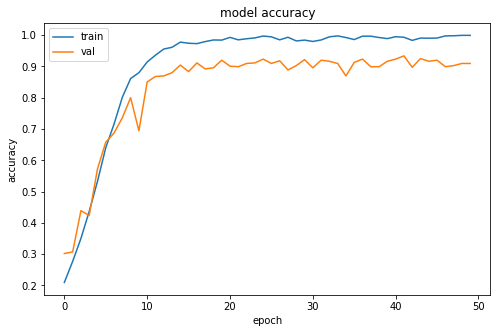

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


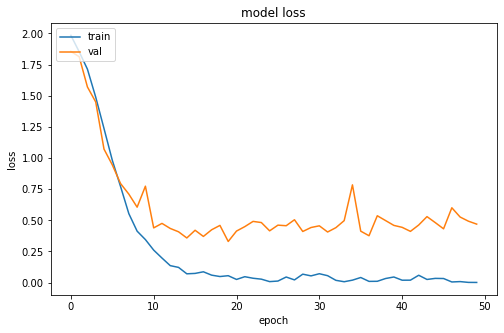

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict([X_test,X_test2])
y_test2 = []
y_pred2 = []
for i in range(len(y_test)):
    y_pred2.append(np.argmax(y_pred[i]))
    y_test2.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy =",accuracy_score(y_pred2,y_test2) * 100)

Accuracy = 90.97222222222221


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.94      0.88      0.91        69
           2       0.89      0.95      0.92        83
           3       0.85      0.80      0.83        71
           4       1.00      0.90      0.95        77
           5       0.91      0.98      0.94        82
           6       0.92      0.94      0.93        70
           7       0.93      0.93      0.93        87

    accuracy                           0.91       576
   macro avg       0.90      0.90      0.90       576
weighted avg       0.91      0.91      0.91       576



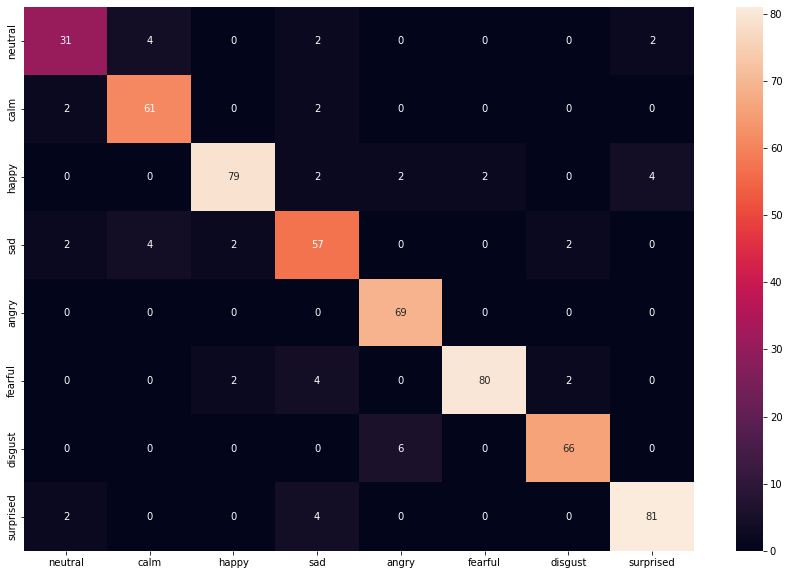

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(y_pred2,y_test2), index = [i for i in ['neutral','calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']],
                  columns = [i for i in ['neutral','calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)